In [91]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import timeit
start = timeit.default_timer()
class KMeans:
    def __init__(self):
        self.finalCentroid=[]
        self.data=[]
    def initializeCentroids(self):
        self.data=np.loadtxt('clusters.txt',delimiter=',')
        k=3
        data_=pd.read_csv('clusters.txt')
        data_.columns=['x','y']
        #plt.scatter(data_['x'],data_['y'])
        #plt.show()
        ind=[i for i in np.random.randint(0,self.data.shape[0]-1,size=3)]
        num_instances, num_features=self.data.shape
        randomPoints=self.data[np.random.randint(0, num_instances - 1, size=k)]
        return randomPoints
    
    def calculateEucledianDist(self,l1,l2):
        return math.sqrt((l1[0]-l2[0])**2+(l1[1]-l2[1])**2)


    def getClusterAssociation(self, randomPoints):
        clusterAssociation_=[]
        getMinDist=[]
        for i, j in enumerate(self.data):
            for m,n in enumerate(randomPoints):
                getMinDist.append(self.calculateEucledianDist(j,n))
            minDist=min(getMinDist)
            minDistIndex=getMinDist.index(minDist)
            clusterAssociation_.append(minDistIndex)
            getMinDist=[]
        return clusterAssociation_

    def getCountOfInstancesPerCluster(self,clusterAssociation):
        clus0=0
        clus1=0
        clus2=0
        for i,j in enumerate(clusterAssociation):
            if j==0:
                clus0+=1
            elif j==1:
                clus1+=1
            else:
                clus2+=1
        return(clus0, clus1, clus2)

    def stepByStepMovement(self,clusterAssociation,randomPoints):
        for i,j in enumerate(clusterAssociation):
            if j==0:
                plt.scatter(self.data[i][0],self.data[i][1],color='r')
            elif j==1:
                plt.scatter(self.data[i][0],self.data[i][1],color='b')
            else:
                plt.scatter(self.data[i][0],self.data[i][1],color='g')
        for i in randomPoints:
            plt.scatter(i[0],i[1],color='black',marker='x')
        plt.show()        


    def calculateNewPositionsForCentroids(self,clusterAssociation, randomPoints):
        tempRandomPointsx0=0
        tempRandomPointsy0=0
        tempRandomPointsx1=0
        tempRandomPointsy1=0
        tempRandomPointsx2=0
        tempRandomPointsy2=0
        newRandomPoints=[]
        clus0, clus1, clus2 = self.getCountOfInstancesPerCluster(clusterAssociation)
        for i,j in enumerate(clusterAssociation):
            if j==0:

                tempRandomPointsx0+=self.data[i][0]
                tempRandomPointsy0+=self.data[i][1]

            elif j==1:
                tempRandomPointsx1+=self.data[i][0]
                tempRandomPointsy1+=self.data[i][1]
            else:

                tempRandomPointsx2+=self.data[i][0]
                tempRandomPointsy2+=self.data[i][1]
        newRandomPoints.append([tempRandomPointsx0/clus0,tempRandomPointsy0/clus0])
        newRandomPoints.append([tempRandomPointsx1/clus1,tempRandomPointsy1/clus1])
        newRandomPoints.append([tempRandomPointsx2/clus2,tempRandomPointsy2/clus2])

        #print('new centroid\n {}'.format(np.array(newRandomPoints)))
        #print('old centroid\n {}'.format(randomPoints))

        return np.array(newRandomPoints), randomPoints 
    
    def getPointsClosestToCentroid(self, clusterAssociation):
        clus0=[]
        clus1=[]
        clus2=[]
        for i,j in enumerate(clusterAssociation):
            if j==0:
                clus0.append(self.data[i])
            elif j==1:
                clus1.append(self.data[i])
            else:
                clus2.append(self.data[i])
        return clus0, clus1, clus2        

    def visualizeFinalPlot(self,randomPoints):
        start_time = timeit.default_timer()
        while (True):
            clusterAssociation=obj.getClusterAssociation(randomPoints)
            randomPoints, oldRandomPoints=obj.calculateNewPositionsForCentroids(clusterAssociation, randomPoints)
            #obj.stepByStepMovement(clusterAssociation, randomPoints)
            if(math.fabs(sum(sum(oldRandomPoints-randomPoints))) < 0.0000002):
                break
        self.finalCentroid=randomPoints
        clus0,clus1, clus2=self.getPointsClosestToCentroid(clusterAssociation)
        elapsed = timeit.default_timer() - start_time
        print (elapsed)
        return clus0, clus1, clus2, self.finalCentroid, clusterAssociation, randomPoints
    
     

In [92]:
obj=KMeans()

m1,m2,m3, centroids, clusterAssc, finalPoints=obj.visualizeFinalPlot(obj.initializeCentroids())

0.009714801168229314


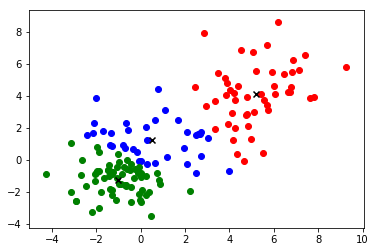

Centriod:
 [[ 5.17290392  4.13591368]
 [ 0.49711036  1.26696375]
 [-1.0393701  -1.23803927]]
0.64817006886733


In [93]:
obj.stepByStepMovement(clusterAssc,finalPoints)
print("Centriod:\n", centroids)
print  (timeit.default_timer() - start)